In [1]:
import psycopg2
import sqlalchemy

In [2]:
import DO_ML
from DO_ML.do_model import *

pandas as pd, numpy as np, matplotlib as plt, seaborn as sns, sklearn.preprocessing


C:\Users\odoniku\Anaconda3\envs\RetentionAnalysis\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
C:\Users\odoniku\Anaconda3\envs\RetentionAnalysis\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
C:\Users\odoniku\Anaconda3\envs\RetentionAnalysis\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
C:\Users\odoniku\Anaconda3\envs\RetentionAnalysis\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
C:\Users\odoniku\Anaconda3\envs\RetentionAnalysis\lib\importlib\_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompa

In [3]:
%reload_ext sql
import dbconfig
from dbconfig import pdbConfig as pg
from dbconfig import db_uri_string

In [4]:
input = InputDataFrame()
file = r"C:\Users\odoniku\Dropbox\Personal\Courses\Code-Data-Science-and-Deep-Learning-for-Business-20191207\datascienceforbusiness-master\hr_data.csv"
db_table = "hr_data"
csvfile = input.get_csvfile(file)

In [5]:
%sql postgresql://{pg["username"]}:{pg["password"]}@{pg["hostname"]}/{pg["db"]}

'Connected: postgres@retentionStudy'

In [6]:
# %%sql DROP TABLE hr_data;

# CREATE TABLE IF NOT EXISTS hr_data( 
#     employee_id integer not null, 
#     number_project integer, 
#     average_montly_hours integer, 
#     time_spend_company integer, 
#     Work_accident integer, 
#     "left" integer, 
#     promotion_last_5years integer, 
#     department varchar(50), 
#     salary character varying(50), 
#     CONSTRAINT hr_data_pkey PRIMARY KEY (employee_id))

In [7]:
# !pgcsv --db postgresql://{pg["username"]}:{pg["password"]}@{pg["hostname"]}/{pg["db"]} hr_data "\Users\odoniku\Dropbox\Personal\Courses\Code-Data-Science-and-Deep-Learning-for-Business-20191207\datascienceforbusiness-master\hr_data.csv"

In [8]:
# query = 'SELECT * FROM "hr_data" limit 10;'
# in_d = pd.read_sql(query, uri_string)

In [9]:
input_df = input.get_input(csvfile)

In [10]:
input_df.head()

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary
0,1003,2,157,3,False,True,False,sales,low
1,1005,5,262,6,False,True,False,sales,medium
2,1486,7,272,4,False,True,False,sales,medium
3,1038,5,223,5,False,True,False,sales,low
4,1057,2,159,3,False,True,False,sales,low


In [11]:
summary_stats(input_df)

,employee_id,number_project,average_montly_hours,time_spend_company
count,14999.000000,14999.000000,14999.000000,14999.000000
mean,45424.627575,3.803054,201.050337,3.498233
std,25915.900127,1.232592,49.943099,1.460136
min,1003.000000,2.000000,96.000000,2.000000
25%,22872.500000,3.000000,156.000000,3.000000
50%,45448.000000,4.000000,200.000000,3.000000
75%,67480.500000,5.000000,245.000000,4.000000
max,99815.000000,7.000000,310.000000,10.000000


In [12]:
input_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
employee_id              14999 non-null int64
number_project           14999 non-null int64
average_montly_hours     14999 non-null int64
time_spend_company       14999 non-null int64
Work_accident            14999 non-null bool
left                     14999 non-null bool
promotion_last_5years    14999 non-null bool
department               14999 non-null object
salary                   14999 non-null object
dtypes: bool(3), int64(4), object(2)
memory usage: 747.1+ KB


In [13]:
find_missing(input_df)

'None'

In [14]:
print("unique department: \n", input_df["department"].unique())
print()
print("unique salary: \n", input_df["salary"].unique())

unique department: 
 ['sales' 'accounting' 'hr' 'technical' 'support' 'management' 'IT'
 'product_mng' 'marketing' 'RandD']

unique salary: 
 ['low' 'medium' 'high']


In [15]:
#import the employee satifaction file
satisfaction_file = "https://raw.githubusercontent.com/rajeevratan84/datascienceforbusiness/master/employee_satisfaction_evaluation.xlsx"
satisfaction_file = r"C:\Users\odoniku\Dropbox\Personal\Courses\Code-Data-Science-and-Deep-Learning-for-Business-20191207\datascienceforbusiness-master\employee_satisfaction_evaluation.xlsx"
satisfaction = InputDataFrame().get_input(satisfaction_file)

In [16]:
satisfaction.head()

,EMPLOYEE #,satisfaction_level,last_evaluation
0,1003,0.38,0.53
1,1005,0.80,0.86
2,1486,0.11,0.88
3,1038,0.72,0.87
4,1057,0.37,0.52


In [17]:
satisfaction.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 3 columns):
EMPLOYEE #            14999 non-null int64
satisfaction_level    14972 non-null float64
last_evaluation       14972 non-null float64
dtypes: float64(2), int64(1)
memory usage: 351.7 KB


In [18]:
#merge the two input files
input_merged = input_df.set_index("employee_id").join(satisfaction.set_index("EMPLOYEE #"))
input_merged.reset_index(inplace=True)
fill_na_with_mean(input_merged)

In [19]:
find_missing(input_merged)

'None'

In [20]:
find_row(input_merged, "employee_id", 3794)

,employee_id,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
18,3794,2,160,3,True,True,True,sales,low,0.61283,0.716125


In [21]:
input_employee_dropped = drop_columns(input_merged, ["employee_id"])
input_employee_dropped.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,department,salary,satisfaction_level,last_evaluation
0,2,157,3,False,True,False,sales,low,0.38,0.53
1,5,262,6,False,True,False,sales,medium,0.80,0.86
2,7,272,4,False,True,False,sales,medium,0.11,0.88
3,5,223,5,False,True,False,sales,low,0.72,0.87
4,2,159,3,False,True,False,sales,low,0.37,0.52


In [22]:
group_by_column(input_employee_dropped, ["department"])[1]

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation
department,,,,,,,,
IT,3.816626,202.215974,3.468623,0.133659,0.222494,0.002445,0.617908,0.716750
RandD,3.853875,200.800508,3.367217,0.170267,0.153748,0.034307,0.619822,0.712130
accounting,3.825293,201.162973,3.522816,0.125163,0.265971,0.018253,0.582377,0.718000
hr,3.654939,198.684709,3.355886,0.120433,0.290934,0.020298,0.598830,0.709075
management,3.860317,201.249206,4.303175,0.163492,0.144444,0.109524,0.621850,0.724182
marketing,3.687646,199.385781,3.569930,0.160839,0.236597,0.050117,0.618442,0.715555
product_mng,3.807095,199.965632,3.475610,0.146341,0.219512,0.000000,0.619951,0.714703
sales,3.776329,200.911353,3.534058,0.141787,0.244928,0.024155,0.614440,0.709719
support,3.803948,200.758188,3.393001,0.154778,0.248991,0.008973,0.618173,0.722985


In [23]:
# corr_plot(input_employee_dropped)

In [24]:
categorical = get_columnlist_from_dtypes(input_employee_dropped, ["object"])
categorical

['department', 'salary']

In [25]:
input_encoded = hot_encode(input_employee_dropped, categorical)
input_encoded.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,False,True,False,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,False,True,False,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,False,True,False,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,False,True,False,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,False,True,False,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


In [26]:
column_distribution(input_encoded, "left")

False    11428
True      3571
Name: left, dtype: int64

In [27]:
X_train, X_test, y_train, y_test = split_dataset(input_encoded, "left")

In [28]:
X_train, X_test = normalize_x(X_train, X_test, scaler="standard")

In [29]:
X_train_df, X_test_df = make_dataframe(X_train), make_dataframe(X_test)

In [30]:
X_train_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,0.153049,-1.204838,-1.028496,-0.404888,-0.149407,-1.091620,-0.274188,-0.236386,-0.235599,-0.222293,-0.212196,-0.24928,-0.249845,1.626995,-0.418456,-0.472641,1.019781,-0.861550
1,-0.655242,0.532520,-1.028496,-0.404888,6.693109,0.475161,-0.157127,-0.236386,-0.235599,-0.222293,-0.212196,-0.24928,-0.249845,1.626995,-0.418456,-0.472641,-0.980603,1.160699
2,-0.655242,0.752186,-0.345356,-0.404888,-0.149407,0.073422,1.013490,-0.236386,-0.235599,-0.222293,-0.212196,-0.24928,-0.249845,-0.614630,-0.418456,-0.472641,-0.980603,1.160699
3,-0.655242,1.271396,-1.028496,2.469818,-0.149407,0.434987,-0.683904,-0.236386,-0.235599,-0.222293,-0.212196,-0.24928,-0.249845,1.626995,-0.418456,-0.472641,-0.980603,-0.861550
4,0.153049,-0.985172,-0.345356,-0.404888,-0.149407,-0.167621,0.779366,-0.236386,-0.235599,-0.222293,-0.212196,-0.24928,-0.249845,1.626995,-0.418456,-0.472641,-0.980603,1.160699


In [31]:
x_df_for_split = drop_columns(input_encoded, ["left"])
x_df_for_split.head()

,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,satisfaction_level,last_evaluation,department_RandD,department_accounting,department_hr,department_management,department_marketing,department_product_mng,department_sales,department_support,department_technical,salary_low,salary_medium
0,2,157,3,False,False,0.38,0.53,0,0,0,0,0,0,1,0,0,1,0
1,5,262,6,False,False,0.80,0.86,0,0,0,0,0,0,1,0,0,0,1
2,7,272,4,False,False,0.11,0.88,0,0,0,0,0,0,1,0,0,0,1
3,5,223,5,False,False,0.72,0.87,0,0,0,0,0,0,1,0,0,1,0
4,2,159,3,False,False,0.37,0.52,0,0,0,0,0,0,1,0,0,1,0


## Logistic Regression model

In [32]:
# log_reg = LogRegression(X_train, X_test, y_train, y_test)

In [33]:
# log_reg.fit_model()

In [34]:
# y_predicted = log_reg.make_prediction()

In [35]:
# accuracy = log_reg.get_accuracy_score()
# accuracy

In [36]:
# cmatrix = log_reg.get_confusion_matrix()
# cmatrix

In [37]:
# class_report = log_reg.get_classification_report()
# print(class_report)

## Random Forest model

In [68]:
forest = RandomForestC(X_train, X_test, y_train, y_test, target_mapper={0:"Stayed", 1:"Left"})

In [69]:
forest.fit_model()
y_pred = forest.make_prediction()

In [70]:
forest.get_accuracy_score()

'98.83%'

In [71]:
forest.get_confusion_matrix()

array([[2310,    7],
       [  28,  655]], dtype=int64)

In [72]:
print(forest.get_classification_report())

              precision    recall  f1-score   support

       False       0.99      1.00      0.99      2317
        True       0.99      0.96      0.97       683

    accuracy                           0.99      3000
   macro avg       0.99      0.98      0.98      3000
weighted avg       0.99      0.99      0.99      3000



In [73]:
forest.get_important_features(x_df_for_split)

,Feature,Importance
0,satisfaction_level,31.0%
1,time_spend_company,18.5%
2,number_project,18.4%
3,average_montly_hours,15.4%
4,last_evaluation,12.4%
5,Work_accident,0.9%
6,salary_low,0.8%
7,salary_medium,0.4%
8,department_technical,0.4%
9,department_sales,0.3%


In [74]:
forest.get_confusion_matrix_params()

'TruePositive=655; TrueNegative=2310; FalsePositive (Type1-error)=7; FalseNegative (Type2-error)=28.  NOTE: Positive ="Left"'

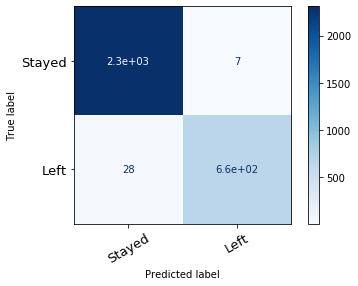

In [75]:
forest.draw_confusion_matrix()

## Deep Learning Model

In [46]:
import tensorflow
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [47]:
nnclassifier = NeuralNetC(X_train, X_test, y_train, y_test, target_mapper={0:"Stayed", 1:"Left"})

In [48]:
nnclassifier.get_default_params()

{'width': 5,
 'kernel_initializer': 'uniform',
 'activation': 'relu',
 'input_dim': 1,
 'optimizer': 'adam',
 'loss': 'binary_crossentropy',
 'metrics': ['accuracy'],
 'batch_size': 20,
 'epochs': 35}

In [49]:
layer1 = nnclassifier.set_params(width=9, input_dim=18)
layer2 = nnclassifier.set_params(width=1, activation="sigmoid")
layers = [layer1, layer2]

In [50]:
for layer in layers:
    nnclassifier.add_layer(layer)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 171       
Total params: 171
Trainable params: 171
Non-trainable params: 0
_________________________________________________________________
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 171       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 10        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [59]:
layer3 = nnclassifier.set_params(input_dim=18, width=12)
nnclassifier.add_layer(layer3)

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 9)                 171       
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 10        
_________________________________________________________________
dense_2 (Dense)              (None, 12)                24        
Total params: 181
Trainable params: 181
Non-trainable params: 0
_________________________________________________________________


In [51]:
nnclassifier.compile_model()

In [55]:
nnclassifier.fit_model(epochs=12)

Train on 11999 samples, validate on 3000 samples
Epoch 1/12
11999/11999 [==============================] - 2s 172us/sample - loss: 0.1424 - accuracy: 0.9567 - val_loss: 0.1513 - val_accuracy: 0.9583
Epoch 2/12
11999/11999 [==============================] - 2s 169us/sample - loss: 0.1419 - accuracy: 0.9570 - val_loss: 0.1522 - val_accuracy: 0.9587
Epoch 3/12
11999/11999 [==============================] - 2s 170us/sample - loss: 0.1415 - accuracy: 0.9569 - val_loss: 0.1513 - val_accuracy: 0.9577
Epoch 4/12
11999/11999 [==============================] - 2s 176us/sample - loss: 0.1411 - accuracy: 0.9564 - val_loss: 0.1518 - val_accuracy: 0.9570
Epoch 5/12
11999/11999 [==============================] - 2s 172us/sample - loss: 0.1410 - accuracy: 0.9572 - val_loss: 0.1505 - val_accuracy: 0.9593
Epoch 6/12
11999/11999 [==============================] - 2s 173us/sample - loss: 0.1404 - accuracy: 0.9562 - val_loss: 0.1511 - val_accuracy: 0.9593
Epoch 7/12
11999/11999 [===========================

In [56]:
nnclassifier.get_accuracy_score()

Test Loss: 0.14861549687385558
Test Accuracy: 0.95933336


[0.14861549687385558, 0.95933336]

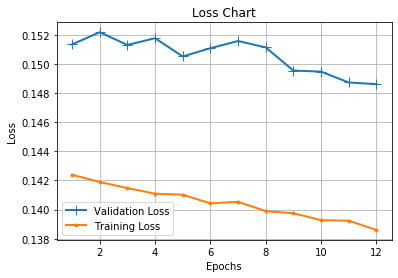

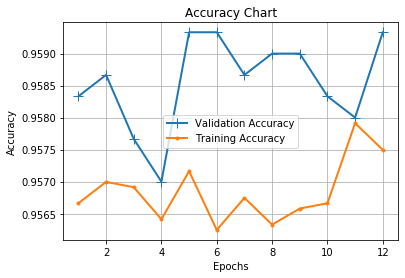

In [57]:
nnclassifier.plot_score()

In [60]:
nnclassifier.get_classification_report()

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

In [67]:
get_columnlist_from_dtypes(input_encoded, ["object"])

[]